In [1]:
# neccessary imports
import pandas as pd
import numpy as np

In [2]:
# read the data
pd.set_option('display.max_columns', None)
data = pd.read_csv('../data/insuranceFraud.csv')

In [3]:
# lets take a look at the data
data.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,10/17/2014,OH,250/500,1000,1406.91,0,466132,MALE,MD,craft-repair,sleeping,husband,53300,0,1/25/2015,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,Columbus,9935 4th Drive,5,1,YES,1,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y
1,228,42,342868,6/27/2006,IN,250/500,2000,1197.22,5000000,468176,MALE,MD,machine-op-inspct,reading,other-relative,0,0,1/21/2015,Vehicle Theft,?,Minor Damage,Police,VA,Riverwood,6608 MLK Hwy,8,1,?,0,0,?,5070,780,780,3510,Mercedes,E400,2007,Y
2,134,29,687698,9/6/2000,OH,100/300,2000,1413.14,5000000,430632,FEMALE,PhD,sales,board-games,own-child,35100,0,2/22/2015,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Columbus,7121 Francis Lane,7,3,NO,2,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N
3,256,41,227811,5/25/1990,IL,250/500,2000,1415.74,6000000,608117,FEMALE,PhD,armed-forces,board-games,unmarried,48900,-62400,1/10/2015,Single Vehicle Collision,Front Collision,Major Damage,Police,OH,Arlington,6956 Maple Drive,5,1,?,1,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y
4,228,44,367455,6/6/2014,IL,500/1000,1000,1583.91,6000000,610706,MALE,Associate,sales,board-games,unmarried,66000,-46000,2/17/2015,Vehicle Theft,?,Minor Damage,None,NY,Arlington,3041 3rd Ave,20,1,NO,0,1,NO,6500,1300,650,4550,Accura,RSX,2009,N


In [4]:
print(data.shape)

(1000, 39)


In [5]:
# In this dataset, missing values have been denoted by '?'
# lets replace ? with NaN so that we can impute them down the line.
data = data.replace('?',np.nan)

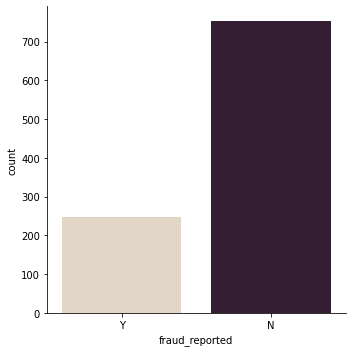

In [115]:
import seaborn as sns
sns.catplot(data=data, x="fraud_reported", kind="count", palette="ch:.25")


In [6]:
# list of columns not necessary for prediction
cols_to_drop=['policy_number','policy_bind_date','policy_state','insured_zip','incident_location','incident_date','incident_state','incident_city','insured_hobbies','auto_make','auto_model','auto_year']

In [7]:
# drop the unnecessary columns
data.drop(columns=cols_to_drop,inplace=True)

In [8]:
data.shape

(1000, 27)

In [9]:
# checking the data after dropping the columns
data.head()

,months_as_customer,age,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,insured_relationship,capital-gains,capital-loss,incident_type,collision_type,incident_severity,authorities_contacted,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,fraud_reported
0,328,48,250/500,1000,1406.91,0,MALE,MD,craft-repair,husband,53300,0,Single Vehicle Collision,Side Collision,Major Damage,Police,5,1,YES,1,2,YES,71610,6510,13020,52080,Y
1,228,42,250/500,2000,1197.22,5000000,MALE,MD,machine-op-inspct,other-relative,0,0,Vehicle Theft,NaN,Minor Damage,Police,8,1,NaN,0,0,NaN,5070,780,780,3510,Y
2,134,29,100/300,2000,1413.14,5000000,FEMALE,PhD,sales,own-child,35100,0,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,7,3,NO,2,3,NO,34650,7700,3850,23100,N
3,256,41,250/500,2000,1415.74,6000000,FEMALE,PhD,armed-forces,unmarried,48900,-62400,Single Vehicle Collision,Front Collision,Major Damage,Police,5,1,NaN,1,2,NO,63400,6340,6340,50720,Y
4,228,44,500/1000,1000,1583.91,6000000,MALE,Associate,sales,unmarried,66000,-46000,Vehicle Theft,NaN,Minor Damage,None,20,1,NO,0,1,NO,6500,1300,650,4550,N


In [10]:
# check for missing values
data.isna().sum()
# missing values only in the categorical columns looks like

months_as_customer               0
age                              0
policy_csl                       0
policy_deductable                0
policy_annual_premium            0
umbrella_limit                   0
insured_sex                      0
insured_education_level          0
insured_occupation               0
insured_relationship             0
capital-gains                    0
capital-loss                     0
incident_type                    0
collision_type                 178
incident_severity                0
authorities_contacted            0
incident_hour_of_the_day         0
number_of_vehicles_involved      0
property_damage                360
bodily_injuries                  0
witnesses                        0
police_report_available        343
total_claim_amount               0
injury_claim                     0
property_claim                   0
vehicle_claim                    0
fraud_reported                   0
dtype: int64

In [11]:
# check for the number of categorical and numerical columns
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 27 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_csl                   1000 non-null   object 
 3   policy_deductable            1000 non-null   int64  
 4   policy_annual_premium        1000 non-null   float64
 5   umbrella_limit               1000 non-null   int64  
 6   insured_sex                  1000 non-null   object 
 7   insured_education_level      1000 non-null   object 
 8   insured_occupation           1000 non-null   object 
 9   insured_relationship         1000 non-null   object 
 10  capital-gains                1000 non-null   int64  
 11  capital-loss                 1000 non-null   int64  
 12  incident_type                1000 non-null   object 
 13  collision_type     

In [12]:
# Extract the categorical columns from the dataset
cat_df = data.select_dtypes(include=['object']).copy()

In [13]:
cat_df.columns

Index(['policy_csl', 'insured_sex', 'insured_education_level',
       'insured_occupation', 'insured_relationship', 'incident_type',
       'collision_type', 'incident_severity', 'authorities_contacted',
       'property_damage', 'police_report_available', 'fraud_reported'],
      dtype='object')

In [14]:
cat_df.head()

,policy_csl,insured_sex,insured_education_level,insured_occupation,insured_relationship,incident_type,collision_type,incident_severity,authorities_contacted,property_damage,police_report_available,fraud_reported
0,250/500,MALE,MD,craft-repair,husband,Single Vehicle Collision,Side Collision,Major Damage,Police,YES,YES,Y
1,250/500,MALE,MD,machine-op-inspct,other-relative,Vehicle Theft,NaN,Minor Damage,Police,NaN,NaN,Y
2,100/300,FEMALE,PhD,sales,own-child,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NO,NO,N
3,250/500,FEMALE,PhD,armed-forces,unmarried,Single Vehicle Collision,Front Collision,Major Damage,Police,NaN,NO,Y
4,500/1000,MALE,Associate,sales,unmarried,Vehicle Theft,NaN,Minor Damage,None,NO,NO,N


In [15]:
cat_df.shape

(1000, 12)

Checking the categorical values present in the columns to decide for getDummies encode or custom mapping to convert categorical data to numeric one

In [16]:
list(cat_df.columns)

['policy_csl',
 'insured_sex',
 'insured_education_level',
 'insured_occupation',
 'insured_relationship',
 'incident_type',
 'collision_type',
 'incident_severity',
 'authorities_contacted',
 'property_damage',
 'police_report_available',
 'fraud_reported']

In [17]:
for column in list(cat_df.columns):
    print(f'{column}, unique values ', cat_df[column].unique())
    print('num values: ', cat_df[column].nunique())

policy_csl, unique values  ['250/500' '100/300' '500/1000']
num values:  3
insured_sex, unique values  ['MALE' 'FEMALE']
num values:  2
insured_education_level, unique values  ['MD' 'PhD' 'Associate' 'Masters' 'High School' 'College' 'JD']
num values:  7
insured_occupation, unique values  ['craft-repair' 'machine-op-inspct' 'sales' 'armed-forces' 'tech-support'
 'prof-specialty' 'other-service' 'priv-house-serv' 'exec-managerial'
 'protective-serv' 'transport-moving' 'handlers-cleaners' 'adm-clerical'
 'farming-fishing']
num values:  14
insured_relationship, unique values  ['husband' 'other-relative' 'own-child' 'unmarried' 'wife' 'not-in-family']
num values:  6
incident_type, unique values  ['Single Vehicle Collision' 'Vehicle Theft' 'Multi-vehicle Collision'
 'Parked Car']
num values:  4
collision_type, unique values  ['Side Collision' nan 'Rear Collision' 'Front Collision']
num values:  3
incident_severity, unique values  ['Major Damage' 'Minor Damage' 'Total Loss' 'Trivial Damage']

In [21]:
 # handle the missing values in the three categorical features. - impute with most frequent
print(cat_df['property_damage'].unique())
print(cat_df['collision_type'].unique())
print(cat_df['police_report_available'].unique())

['YES' nan 'NO']
['Side Collision' nan 'Rear Collision' 'Front Collision']
['YES' nan 'NO']


In [22]:
# lets handle the missing values 
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='most_frequent')

# imputing the missing values from the column
cat_df['collision_type'] = imputer.fit_transform(cat_df['collision_type'].values.reshape(-1,1))
cat_df['property_damage'] = imputer.fit_transform(cat_df['property_damage'].values.reshape(-1,1))
cat_df['police_report_available'] = imputer.fit_transform(cat_df['police_report_available'].values.reshape(-1,1))


print(cat_df['property_damage'].unique())
print(cat_df['collision_type'].unique())
print(cat_df['police_report_available'].unique())

['YES' 'NO']
['Side Collision' 'Rear Collision' 'Front Collision']
['YES' 'NO']


In [24]:
# Now lets do encoding of categorial variables to numerical values (where order matters)
print(cat_df['policy_csl'].unique())
print(cat_df['insured_sex'].unique())
print(cat_df['incident_severity'].unique())
print(cat_df['insured_education_level'].unique())
print(cat_df['property_damage'].unique())
print(cat_df['police_report_available'].unique())
print(cat_df['fraud_reported'].unique())

['250/500' '100/300' '500/1000']
['MALE' 'FEMALE']
['Major Damage' 'Minor Damage' 'Total Loss' 'Trivial Damage']
['MD' 'PhD' 'Associate' 'Masters' 'High School' 'College' 'JD']
['YES' 'NO']
['YES' 'NO']
['Y' 'N']


In [25]:
# custom mapping for encoding - this mapping is done for all the categorial variables where the order matters -- for eg: here Male and Female 
# also order matters as males are more prone to accidents than female
cat_df['policy_csl'] = cat_df['policy_csl'].map({'100/300' : 1, '250/500' : 2.5 ,'500/1000':5})
cat_df['insured_sex'] = cat_df['insured_sex'].map({'FEMALE' : 0, 'MALE' : 1})
cat_df['insured_education_level'] = cat_df['insured_education_level'].map({'JD' : 1, 'High School' : 2,'College':3,'Masters':4,'Associate':5,'MD':6,'PhD':7})
cat_df['incident_severity'] = cat_df['incident_severity'].map({'Trivial Damage' : 1, 'Minor Damage' : 2,'Major Damage':3,'Total Loss':4})
cat_df['property_damage'] = cat_df['property_damage'].map({'NO' : 0, 'YES' : 1})
cat_df['police_report_available'] = cat_df['police_report_available'].map({'NO' : 0, 'YES' : 1})
cat_df['fraud_reported'] = cat_df['fraud_reported'].map({'N' : 0, 'Y' : 1})

print(cat_df['policy_csl'].unique())
print(cat_df['insured_sex'].unique())
print(cat_df['incident_severity'].unique())
print(cat_df['insured_education_level'].unique())
print(cat_df['property_damage'].unique())
print(cat_df['police_report_available'].unique())
print(cat_df['fraud_reported'].unique())

[2.5 1.  5. ]
[1 0]
[3 2 4 1]
[6 7 5 4 2 3 1]
[1 0]
[1 0]
[1 0]


In [28]:
cat_df.head()

,policy_csl,insured_sex,insured_education_level,insured_occupation,insured_relationship,incident_type,collision_type,incident_severity,authorities_contacted,property_damage,police_report_available,fraud_reported
0,2.5,1,6,craft-repair,husband,Single Vehicle Collision,Side Collision,3,Police,1,1,1
1,2.5,1,6,machine-op-inspct,other-relative,Vehicle Theft,Rear Collision,2,Police,0,0,1
2,1.0,0,7,sales,own-child,Multi-vehicle Collision,Rear Collision,2,Police,0,0,0
3,2.5,0,7,armed-forces,unmarried,Single Vehicle Collision,Front Collision,3,Police,0,0,1
4,5.0,1,5,sales,unmarried,Vehicle Theft,Rear Collision,2,None,0,0,0


In [29]:
print(list(cat_df.columns))

['policy_csl', 'insured_sex', 'insured_education_level', 'insured_occupation', 'insured_relationship', 'incident_type', 'collision_type', 'incident_severity', 'authorities_contacted', 'property_damage', 'police_report_available', 'fraud_reported']


In [37]:
cols_for_label_encoding = ['policy_csl','insured_sex','incident_severity','insured_education_level','property_damage','police_report_available','fraud_reported']

#cols_for_one_hot_encoding1 = [col for col in list(cat_df.columns) if col not in cols_for_label_encoding]
cols_for_one_hot_encoding = cat_df.drop(columns = cols_for_label_encoding).columns

#print(cols_for_one_hot_encoding, cols_for_one_hot_encoding1)
for col in cols_for_one_hot_encoding:
    cat_df = pd.get_dummies(cat_df, columns = [col], prefix = [col], drop_first=True)

In [39]:
# data fter encoding
print(cat_df.head())
cat_df.to_csv('cat_df.csv')

   policy_csl  insured_sex  insured_education_level  incident_severity  \
0         2.5            1                        6                  3   
1         2.5            1                        6                  2   
2         1.0            0                        7                  2   
3         2.5            0                        7                  3   
4         5.0            1                        5                  2   

   property_damage  police_report_available  fraud_reported  \
0                1                        1               1   
1                0                        0               1   
2                0                        0               0   
3                0                        0               1   
4                0                        0               0   

   insured_occupation_armed-forces  insured_occupation_craft-repair  \
0                                0                                1   
1                                0

In [40]:
cat_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 34 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   policy_csl                              1000 non-null   float64
 1   insured_sex                             1000 non-null   int64  
 2   insured_education_level                 1000 non-null   int64  
 3   incident_severity                       1000 non-null   int64  
 4   property_damage                         1000 non-null   int64  
 5   police_report_available                 1000 non-null   int64  
 6   fraud_reported                          1000 non-null   int64  
 7   insured_occupation_armed-forces         1000 non-null   uint8  
 8   insured_occupation_craft-repair         1000 non-null   uint8  
 9   insured_occupation_exec-managerial      1000 non-null   uint8  
 10  insured_occupation_farming-fishing      1000 non-null   uint8

In [41]:
cat_df.shape

(1000, 34)

In [42]:
# extract the numerical columns (what about float datatype? - policy_annual_premium)
num_df = data.select_dtypes(include=['int64', 'float64']).copy()

In [43]:
num_df.shape

(1000, 15)

In [44]:
num_df.columns

Index(['months_as_customer', 'age', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'capital-gains',
       'capital-loss', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'bodily_injuries', 'witnesses',
       'total_claim_amount', 'injury_claim', 'property_claim',
       'vehicle_claim'],
      dtype='object')

In [45]:
num_df.head()

,months_as_customer,age,policy_deductable,policy_annual_premium,umbrella_limit,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim
0,328,48,1000,1406.91,0,53300,0,5,1,1,2,71610,6510,13020,52080
1,228,42,2000,1197.22,5000000,0,0,8,1,0,0,5070,780,780,3510
2,134,29,2000,1413.14,5000000,35100,0,7,3,2,3,34650,7700,3850,23100
3,256,41,2000,1415.74,6000000,48900,-62400,5,1,1,2,63400,6340,6340,50720
4,228,44,1000,1583.91,6000000,66000,-46000,20,1,0,1,6500,1300,650,4550


In [46]:
# combine the Numerical and categorical dataframes to get the final dataset
final_df = pd.concat([num_df,cat_df], axis=1)

In [47]:
final_df.head()

,months_as_customer,age,policy_deductable,policy_annual_premium,umbrella_limit,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,policy_csl,insured_sex,insured_education_level,incident_severity,property_damage,police_report_available,fraud_reported,insured_occupation_armed-forces,insured_occupation_craft-repair,insured_occupation_exec-managerial,insured_occupation_farming-fishing,insured_occupation_handlers-cleaners,insured_occupation_machine-op-inspct,insured_occupation_other-service,insured_occupation_priv-house-serv,insured_occupation_prof-specialty,insured_occupation_protective-serv,insured_occupation_sales,insured_occupation_tech-support,insured_occupation_transport-moving,insured_relationship_not-in-family,insured_relationship_other-relative,insured_relationship_own-child,insured_relationship_unmarried,insured_relationship_wife,incident_type_Parked Car,incident_type_Single Vehicle Collision,incident_type_Vehicle Theft,collision_type_Rear Collision,collision_type_Side Collision,authorities_contacted_Fire,authorities_contacted_None,authorities_contacted_Other,authorities_contacted_Police
0,328,48,1000,1406.91,0,53300,0,5,1,1,2,71610,6510,13020,52080,2.5,1,6,3,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1
1,228,42,2000,1197.22,5000000,0,0,8,1,0,0,5070,780,780,3510,2.5,1,6,2,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,1
2,134,29,2000,1413.14,5000000,35100,0,7,3,2,3,34650,7700,3850,23100,1.0,0,7,2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1
3,256,41,2000,1415.74,6000000,48900,-62400,5,1,1,2,63400,6340,6340,50720,2.5,0,7,3,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1
4,228,44,1000,1583.91,6000000,66000,-46000,20,1,0,1,6500,1300,650,4550,5.0,1,5,2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0


In [114]:
# separating the feature and target columns
x = final_df.drop('fraud_reported',axis=1)
y = final_df['fraud_reported']
print(x.shape, y.shape)

(1000, 48) (1000,)


In [50]:
import matplotlib.pyplot as plt
%matplotlib  inline

(array([349.,   0.,   0., 351.,   0.,   0.,   0.,   0.,   0., 300.]),
 array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. ]),
 <BarContainer object of 10 artists>)

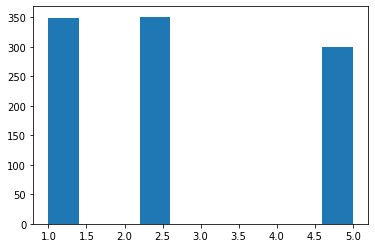

In [51]:
# look at the distribution of data in some columns now
plt.hist(final_df['policy_csl'])
# we  can see that for almost all categories of CSL the data is uniformly distributed

In [52]:
import seaborn as sns

/Users/pawankarki/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  """Entry point for launching an IPython kernel.


<AxesSubplot:xlabel='insured_sex', ylabel='Density'>

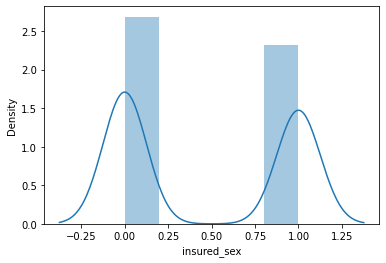

In [53]:
sns.distplot(final_df['insured_sex'])
# we  can see that for almost all categories of the gender of the insured the data is uniformly distributed

In [ ]:
sns.distplot(final_df['insured_education_level'])
# we  can see that for almost all categories of the education level of the person insured the data is uniformly distributed

/Users/pawankarki/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  """Entry point for launching an IPython kernel.


'\nWe can see that there are least claims for trivial incidents,\nmost claims for minor incidents,\nand for major and Total loss incidents the claims are almost equal.\n'

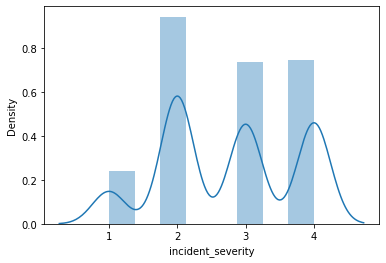

In [54]:
sns.distplot(final_df['incident_severity'])
"""
We can see that there are least claims for trivial incidents,
most claims for minor incidents,
and for major and Total loss incidents the claims are almost equal.
"""

In [55]:
num_df.columns

Index(['months_as_customer', 'age', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'capital-gains',
       'capital-loss', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'bodily_injuries', 'witnesses',
       'total_claim_amount', 'injury_claim', 'property_claim',
       'vehicle_claim'],
      dtype='object')

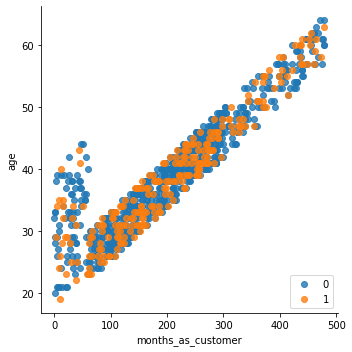

'\nfrom the graph it can be concluded that most of the fraud cases are done by the customers new \nto the company and that too comparatively younger ones. \n'

In [56]:

# Use the 'hue' argument to provide a factor variable
sns.lmplot( x="months_as_customer", y="age", data = final_df, fit_reg=False, hue='fraud_reported', legend=False)
 
# Move the legend to an empty part of the plot
plt.legend(loc='lower right')

plt.show()
"""
from the graph it can be concluded that most of the fraud cases are done by the customers new 
to the company and that too comparatively younger ones. 
"""

<AxesSubplot:>

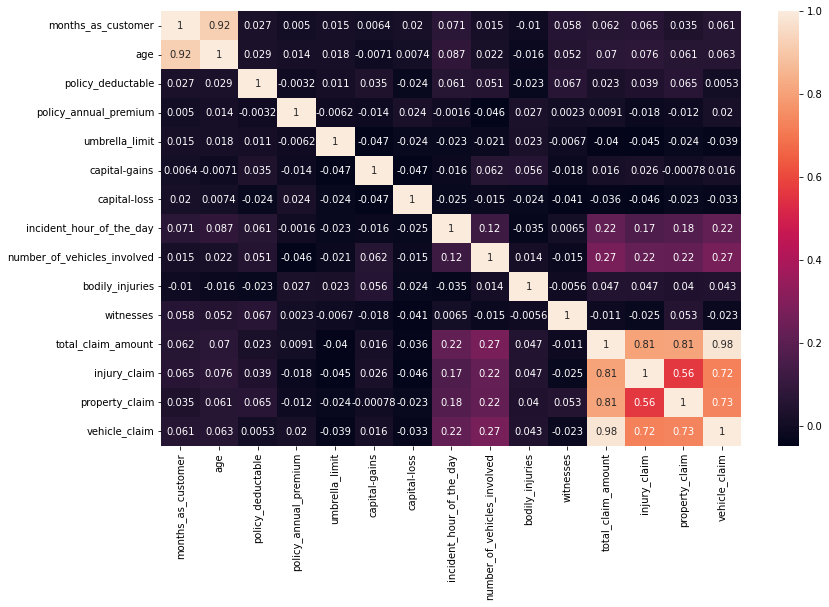

In [57]:
plt.figure(figsize=(13,8))
sns.heatmap(num_df.corr(), annot=True )

From the plot above, we can see that there is high correlation between Age and the number of months. we'll drop the age column.
Also, there is high correlation between total claim amount, injury claim,vehicle claim, and property claim as total claim is the sum of all others. So, we'll drop the total claim column.

In [58]:
x.columns

Index(['months_as_customer', 'age', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'capital-gains',
       'capital-loss', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'bodily_injuries', 'witnesses',
       'total_claim_amount', 'injury_claim', 'property_claim', 'vehicle_claim',
       'policy_csl', 'insured_sex', 'insured_education_level',
       'incident_severity', 'property_damage', 'police_report_available',
       'insured_occupation_armed-forces', 'insured_occupation_craft-repair',
       'insured_occupation_exec-managerial',
       'insured_occupation_farming-fishing',
       'insured_occupation_handlers-cleaners',
       'insured_occupation_machine-op-inspct',
       'insured_occupation_other-service',
       'insured_occupation_priv-house-serv',
       'insured_occupation_prof-specialty',
       'insured_occupation_protective-serv', 'insured_occupation_sales',
       'insured_occupation_tech-support',
       'insured_occupation_tra

In [59]:
x.drop(columns=['age','total_claim_amount'], inplace=True)

In [63]:
# split the data into training and test set
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y = train_test_split(x,y, random_state=355)

In [65]:
x.shape

(1000, 46)

In [81]:
train_x.head()

,months_as_customer,policy_deductable,umbrella_limit,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,injury_claim,property_claim,vehicle_claim,policy_annual_premium,policy_csl,insured_sex,insured_education_level,incident_severity,property_damage,police_report_available,insured_occupation_armed-forces,insured_occupation_craft-repair,insured_occupation_exec-managerial,insured_occupation_farming-fishing,insured_occupation_handlers-cleaners,insured_occupation_machine-op-inspct,insured_occupation_other-service,insured_occupation_priv-house-serv,insured_occupation_prof-specialty,insured_occupation_protective-serv,insured_occupation_sales,insured_occupation_tech-support,insured_occupation_transport-moving,insured_relationship_not-in-family,insured_relationship_other-relative,insured_relationship_own-child,insured_relationship_unmarried,insured_relationship_wife,incident_type_Parked Car,incident_type_Single Vehicle Collision,incident_type_Vehicle Theft,collision_type_Rear Collision,collision_type_Side Collision,authorities_contacted_Fire,authorities_contacted_None,authorities_contacted_Other,authorities_contacted_Police
65,0.435244,-1.037803,-0.468878,0.385876,0.975789,-0.819548,1.162385,1.271286,0.43186,1.285251,-0.128241,1.270329,1362.87,1.0,0,6,2,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
244,-0.930728,-0.209769,-0.468878,-0.904442,-1.546393,-1.248282,-0.812221,0.034626,0.43186,-1.393623,-1.490999,-1.909700,773.99,2.5,1,5,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,1,0,0
595,-1.265778,-1.037803,-0.468878,-0.904442,-0.057480,0.180830,-0.812221,0.034626,0.43186,-1.524700,-0.203255,0.749767,1533.07,1.0,1,1,3,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1
873,1.019433,1.446300,-0.468878,-0.904442,-0.674572,0.895386,-0.812221,-1.202033,0.43186,0.048217,0.042625,-0.592794,1277.12,2.5,0,7,3,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0
631,-0.483995,-0.209769,2.171861,-0.904442,-0.760678,-1.391193,0.175082,0.034626,0.43186,0.474215,-0.540819,0.057108,1439.90,5.0,0,5,4,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0


In [82]:
num_cols = ['months_as_customer', 'policy_deductable', 'umbrella_limit',
       'capital-gains', 'capital-loss', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'bodily_injuries', 'witnesses', 'injury_claim', 'property_claim',
       'vehicle_claim']
num_df_train = train_x[num_cols]
num_df_test = test_x[num_cols]

In [83]:
print(num_df_train.columns)
print(num_df_test.columns)

Index(['months_as_customer', 'policy_deductable', 'umbrella_limit',
       'capital-gains', 'capital-loss', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'bodily_injuries', 'witnesses',
       'injury_claim', 'property_claim', 'vehicle_claim'],
      dtype='object')
Index(['months_as_customer', 'policy_deductable', 'umbrella_limit',
       'capital-gains', 'capital-loss', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'bodily_injuries', 'witnesses',
       'injury_claim', 'property_claim', 'vehicle_claim'],
      dtype='object')


In [84]:
print(train_x.shape)
print(num_df_train.shape)
print(test_x.shape)
print(num_df_test.shape)


(750, 46)
(750, 12)
(250, 46)
(250, 12)


In [87]:
# Scaling the numeric values in the dataset
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [88]:
scaled_train_data = scaler.fit_transform(num_df_train)
scaled_train_num_df = pd.DataFrame(data=scaled_train_data, columns=num_df_train.columns,index = train_x.index)
scaled_train_num_df.shape

(750, 12)

In [89]:
scaled_test_data = scaler.transform(num_df_test)
scaled_test_num_df = pd.DataFrame(data=scaled_test_data, columns=num_df_test.columns,index = test_x.index)
scaled_test_num_df.shape

(250, 12)

In [91]:
print(scaled_train_num_df.isna().sum())
print(scaled_test_num_df.isna().sum())

months_as_customer             0
policy_deductable              0
umbrella_limit                 0
capital-gains                  0
capital-loss                   0
incident_hour_of_the_day       0
number_of_vehicles_involved    0
bodily_injuries                0
witnesses                      0
injury_claim                   0
property_claim                 0
vehicle_claim                  0
dtype: int64
months_as_customer             0
policy_deductable              0
umbrella_limit                 0
capital-gains                  0
capital-loss                   0
incident_hour_of_the_day       0
number_of_vehicles_involved    0
bodily_injuries                0
witnesses                      0
injury_claim                   0
property_claim                 0
vehicle_claim                  0
dtype: int64


In [92]:
train_x.drop(columns = scaled_train_num_df.columns, inplace=True)
test_x.drop(columns = scaled_test_num_df.columns, inplace=True)


In [93]:
print(train_x.shape)
print(test_x.shape)

(750, 34)
(250, 34)


In [94]:
train_x.head()

,policy_annual_premium,policy_csl,insured_sex,insured_education_level,incident_severity,property_damage,police_report_available,insured_occupation_armed-forces,insured_occupation_craft-repair,insured_occupation_exec-managerial,insured_occupation_farming-fishing,insured_occupation_handlers-cleaners,insured_occupation_machine-op-inspct,insured_occupation_other-service,insured_occupation_priv-house-serv,insured_occupation_prof-specialty,insured_occupation_protective-serv,insured_occupation_sales,insured_occupation_tech-support,insured_occupation_transport-moving,insured_relationship_not-in-family,insured_relationship_other-relative,insured_relationship_own-child,insured_relationship_unmarried,insured_relationship_wife,incident_type_Parked Car,incident_type_Single Vehicle Collision,incident_type_Vehicle Theft,collision_type_Rear Collision,collision_type_Side Collision,authorities_contacted_Fire,authorities_contacted_None,authorities_contacted_Other,authorities_contacted_Police
65,1362.87,1.0,0,6,2,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
244,773.99,2.5,1,5,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,1,0,0
595,1533.07,1.0,1,1,3,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1
873,1277.12,2.5,0,7,3,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0
631,1439.90,5.0,0,5,4,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0


In [95]:
train_x = pd.concat([scaled_train_num_df,train_x],axis=1)
test_x = pd.concat([scaled_test_num_df,test_x],axis=1)

In [96]:
train_x.isna().sum()

months_as_customer                        0
policy_deductable                         0
umbrella_limit                            0
capital-gains                             0
capital-loss                              0
incident_hour_of_the_day                  0
number_of_vehicles_involved               0
bodily_injuries                           0
witnesses                                 0
injury_claim                              0
property_claim                            0
vehicle_claim                             0
policy_annual_premium                     0
policy_csl                                0
insured_sex                               0
insured_education_level                   0
incident_severity                         0
property_damage                           0
police_report_available                   0
insured_occupation_armed-forces           0
insured_occupation_craft-repair           0
insured_occupation_exec-managerial        0
insured_occupation_farming-fishi

In [97]:
test_x.isna().sum()

months_as_customer                        0
policy_deductable                         0
umbrella_limit                            0
capital-gains                             0
capital-loss                              0
incident_hour_of_the_day                  0
number_of_vehicles_involved               0
bodily_injuries                           0
witnesses                                 0
injury_claim                              0
property_claim                            0
vehicle_claim                             0
policy_annual_premium                     0
policy_csl                                0
insured_sex                               0
insured_education_level                   0
incident_severity                         0
property_damage                           0
police_report_available                   0
insured_occupation_armed-forces           0
insured_occupation_craft-repair           0
insured_occupation_exec-managerial        0
insured_occupation_farming-fishi

In [108]:
# first using the SVM classifier model training
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

sv_classifier = SVC()
y_pred_svm = sv_classifier.fit(train_x, train_y).predict(test_x)

svm_accuracy = accuracy_score(test_y,y_pred_svm)

print('SVM accuracy: {}'.format(svm_accuracy))

SVM accuracy: 0.728


In [109]:
# SVM classifier with hyper parameter tuning
from sklearn.model_selection import GridSearchCV

param_grid = {"kernel": ['rbf','sigmoid'],
             "C":[0.1,0.5,1.0],
             "random_state":[0,100,200,300]}
svm_best = GridSearchCV(estimator=sv_classifier, param_grid=param_grid, cv=5)
svm_best.fit(train_x, train_y)
print(svm_best.best_estimator_)
y_pred_best_svm = svm_best.predict(test_x)
svm_best_accuracy= accuracy_score(test_y,y_pred_best_svm)
print('SVM accuracy new: {}'.format(svm_best_accuracy))

SVC(C=0.1, random_state=0)
SVM accuracy new: 0.728


In [110]:
# XGboost classifier
from xgboost import XGBClassifier

xgb = XGBClassifier()
y_pred_xgb = xgb.fit(train_x, train_y).predict(test_x)
xgb_accuracy = accuracy_score(test_y,y_pred_xgb)
print('XGBoost Accuracy: {}'.format(xgb_accuracy))

/Users/pawankarki/opt/anaconda3/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[11:34:42] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGBoost Accuracy: 0.744


In [111]:
# XGB hyper parameter tuning
param_grid = {
    "n_estimators": [10, 50, 100, 130], 
    "criterion": ['gini', 'entropy'],
    "max_depth": range(2, 10, 1)
}

#Creating an object of the Grid Search class
xgb_best = GridSearchCV(estimator=xgb, param_grid=param_grid, cv=5,  verbose=3,n_jobs=-1)
#finding the best parameters
xgb_best.fit(train_x, train_y)

Fitting 5 folds for each of 64 candidates, totalling 320 fits
[11:36:26] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:541: 
Parameters: { criterion } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[11:36:26] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/pawankarki/opt/anaconda3/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0, gpu_id=-1,
                                     importance_type='gain',
                                     interaction_constraints='',
                                     learning_rate=0.300000012,
                                     max_delta_step=0, max_depth=6,
                                     min_child_weight=1, missing=nan,
                                     monotone_constraints='()',
                                     n_estimators=100, n_jobs=12,
                                     num_parallel_tree=1, random_state=0,
                                     reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, subsample=1,
                                     tree_method='exact', validate_parameters=1,
        

In [112]:
xgb_best.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, criterion='gini', gamma=0,
              gpu_id=-1, importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=2,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=10, n_jobs=12, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [113]:
y_pred_best_xgb = xgb_best.predict(test_x)
xgb_best_acc = accuracy_score(test_y,y_pred_best_xgb)
print('XGBoost Accuracy: {}'.format(xgb_best_acc))

XGBoost Accuracy: 0.768
